In [41]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [42]:
#сколько будет на вкаде придерживаясь траектории
def calc(sum,m_up0,m_up,percent,batch0,batch):
    per = percent/(12*100)
    for i in range(batch0):
        sum= sum + sum*per+m_up0
    for i in range(batch):
        sum= sum + sum*per+m_up

    return sum

#задача: как выгодней платить кредит, как это указанно в траетории и откладывать во вклад или закрывать преждевременно
# стоит учитывать инфляцию,т.е. и рост зарплаты и откладываемых денег (пока не учитываем)

#выгодная стратегия в которой мы динамически доплачиваем
# к доп еж палтежу а часть откладываем на счет
# часть выводитя с вклада для доп погошения

#еж выплата
def payt(sum_credit,down_payment,credit_term,rate):
    sum_credit-=down_payment
    r = rate/(12*100)
    n = credit_term
    p = sum_credit
    A = (p*r*(1+r)**n)/((1+r)**n-1)
    return A

#переплата
def payt_with_payment(sum_credit,down_payment,credit_term,rate,payment):
    A = payt(sum_credit,down_payment,credit_term,rate)
    
    r = rate / (12 * 100)
    n = credit_term
    p = sum_credit-down_payment

    m_payment = A

    count_m = 0

    sum_p = -sum_credit
    overpayment = payment - A
    while(p>0):
        per_piece = p*r

        
        sum_p += (m_payment + overpayment)
        m_payment-= per_piece
        p-=(m_payment+overpayment)

        count_m+=1
        m_payment = A

    
    return [sum_p,count_m]


credit = 10*10**6
years = 15
month = years*12
percel_mortgage = 10
down_payment = 0

p = payt(credit,0,month,percel_mortgage)

#часть переплаты от высчитанной ежемесячной выплаты
alfa = 0.2
ready_O_P = alfa*p
max_percel_contribution = 16

data = []

partition = 100
for percel_contribution in range(max_percel_contribution+1):
    #i/10 часть доплаты, которая идет на ипотеку
    for i in range(partition+1):

        ready_O_P_P = ready_O_P*i/partition

        A = payt_with_payment(credit, down_payment, month, percel_mortgage, p + ready_O_P_P)
        calcA = calc(ready_O_P-ready_O_P_P,ready_O_P-ready_O_P_P,ready_O_P+p, percel_contribution,A[1], month - A[1])
        traceA = A[0] - calcA

        data.append(traceA)

data_new = np.array([[data[i*(partition+1)+j] for j in range(partition+1)] for i in range(max_percel_contribution+1)])

print("сумма кредита",credit)
print("еж выплата",p)
print("доплата",ready_O_P)
data_new.shape

сумма кредита 10000000
еж выплата 107460.51177081178
доплата 21492.102354162358


(17, 101)

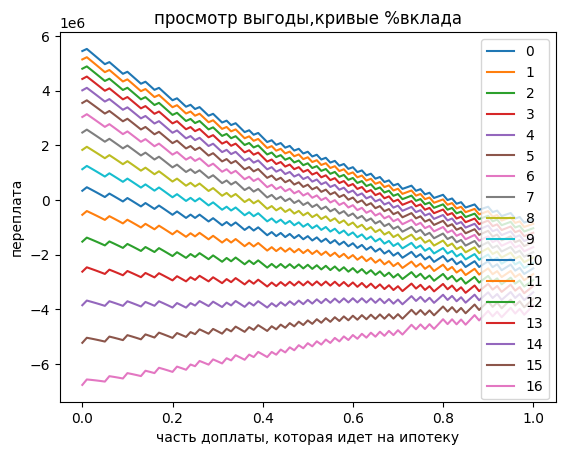

In [43]:

x = [ i/partition for i in range(partition+1)]


for i in range(max_percel_contribution+1):
    plt.plot(x, data_new[i], label=str(i))

plt.legend()

# Добавление заголовка и меток осей
plt.title('просмотр выгоды,кривые %вклада')
plt.xlabel('часть доплаты, которая идет на ипотеку')
plt.ylabel('переплата')

# Показать график
plt.show()

In [44]:
# давайте зафиксируем %вклад 10

In [45]:
percel_contribution = 10

#в каком-то смысле мы будем обучать параметр partition 
#приоритет будет получение бОльшей выгоды, возможно доказать что мы нашли ее в константе или доказать обратное, что оно динамическое

#пусть альфа будет что-то похожее на гиперболу то-есть в начале мы как можно больше платим за ипотеку, после все больше на вклад 

profit -9284588.216998143
contribution 6963441.162748608
manage 16248029.379746752


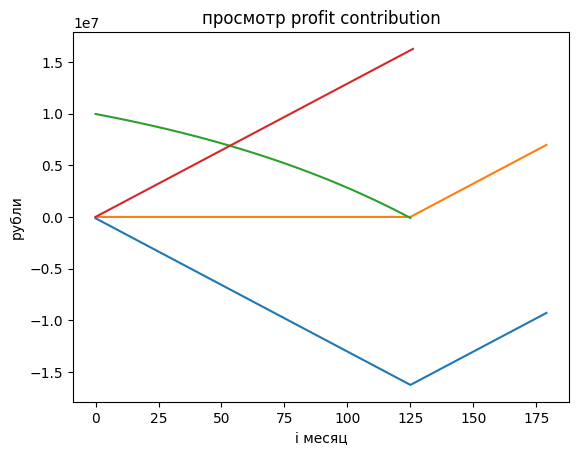

In [46]:

trace_profit = []
trace_contribution = []
trace_cur_credit = []
trace_manage = [0]
#функция которая производит итерацию оплаты 1 месяца,
def once(credit,contribution,profit,percel_m,percel_d,p,ready_O_P,partition):
    in_mortage = ready_O_P*partition
    in_cont = ready_O_P*(1-partition)

    minus = (p+in_mortage)
    credit*=(1+percel_m/100)
    credit-=minus
    #
    plus = (contribution*percel_d/100)+in_cont
    profit+=(plus-minus)
    contribution+=plus

    trace_manage.append(trace_manage[-1]+minus)
    
    arr = [credit,contribution,profit]

    return arr

def trace_partition_F(caral,flag):
    
    #(x)**2+(y)**2=1 # пусть такой закон
    #y=-(1-(x-1)^(2))^(0.5)+1
    
    return 1
    #return -(1-(caral-1)**2)**0.5+1

#функция которая читает траекторию по какому-то закону (идея была изложена)
def law_of_calc(credit,contribution,percel_m,percel_d,month,p,ready_O_P):
    cur_credit = credit
    cur_contribution = contribution
    profit = 0
    
    count_m = 0
    while cur_credit>0:
        count_m+=1
        
        caral = 1-cur_credit/credit
        partition = trace_partition_F(caral,1)
        
        cur_credit,cur_contribution,profit = map(float,once(cur_credit,cur_contribution,profit,percel_m,percel_d,p,ready_O_P,partition))
        
        trace_cur_credit.append(cur_credit)
        trace_profit.append(profit)
        trace_contribution.append(cur_contribution)
    while count_m<month:
        count_m+=1
        
        plus = contribution*percel_d/100+p+ready_O_P
        profit+=plus
        cur_contribution+=plus
        
        trace_profit.append(profit)
        trace_contribution.append(cur_contribution)
        
    return profit
    
print("profit",law_of_calc(credit,0,percel_mortgage/12,percel_contribution/12,month,p,ready_O_P))
print("contribution",trace_contribution[-1])
print("manage",trace_manage[-1])

plt.plot([i for i in range(len(trace_profit))], trace_profit, label="trace_profit")
plt.plot([i for i in range(len(trace_contribution))], trace_contribution, label="trace_contribution")
plt.plot([i for i in range(len(trace_cur_credit))], trace_cur_credit, label="trace_cur_credit")
plt.plot([i for i in range(len(trace_manage))], trace_manage, label="trace_manage")

plt.title('просмотр profit contribution')
plt.xlabel('i месяц')
plt.ylabel('рубли')

# Показать график
plt.show()

In [47]:
#идея обучать траекторию, у нас 180 нейронов, которые являются partition(i) на i-ом месяце
# можно разобраться как влияет partition i на общую картину 
#ЦЕЛЬ увеличит profit => подобрать partition 

#добавляем буквы чтобы визуально выражение казалось меньше 
# a = percel_d/100
#K(i) = ready_O_P*(1-2*partition(i) )
# d = p
#
#profit(i) = contribution(i) *percel_d/100 + ready_O_P*(1-partition(i) ) - p - ready_O_P * partition(i)
# profit(i) = contribution(i) *percel_d/100 + ready_O_P*(1-2*partition(i) ) - p
# profit(i) = contribution(i) * a + K(i) - d 

# ready_O_P = C
# percel_d = L

#credit(i) = credit(i-1) * (1+percel_m/100) - (p+ ready_O_P*partition(i) )


# contribution(i) = contribution(i-1) * (1 + percel_d/100)+ ready_O_P*(1-partition(i))
# A = (1 + percel_d/100)
# B(i) =  ready_O_P*(1-partition(i))

# contribution(i) = contribution(i-1) * A + B(i)
#
# profit(0) = 0
# contribution(0) = 0
# credit(0) = credit (начальная ипотека)
#вычисления с 1 месяца

#profit(i) = (contribution(i-1) * A + B(i)) * a + K(i) - d 
#profit(i) = contribution(i-1) * A * a + B(i)* a + K(i) - d 

#profit(i) = contribution(i-1) * A * a + ready_O_P-ready_O_P*partition(i))* a + ready_O_P - ready_O_P*2*partition(i) ) - d 
#profit(i) = contribution(i-1) * A * a  + 2 * ready_O_P- ready_O_P * 3 * partition(i) - d

#profit(i) = contribution(i-1) * A * a  + ready_O_P * ( 2 - 3 * partition(i) ) - p

#contribution(i) = contribution(i-1) * (1 + percel_d/100)+ ready_O_P*(1-partition(i))

#credit(i) = credit(i-1) * (1+percel_m/100) - p - ready_O_P*partition(i) 
#credit(i) >= 0
# credit(i) = 0 ===> profit(i)  = contribution(i) *percel_d/100 + ready_O_P
# credit(i) = 0 ===> contribution(i) = contribution(i-1)*percel_d/100 + ready_O_P


# 0 <= partition(i) <= 1
# -inf <= profit(i) <= +inf  ===>  надо profit(i) => +inf   1/(1+e**-profit(i)) => 1 тогда  y(i) = 1/(1+e**-profit(i))
# profit(i) = -ln(1/y(i) - 1)


#  partition(i) будем обучать поэлементно 

In [48]:
#оставлю так как надо было знать, что было до 'в ходе размышлейний автор передумал обучать поэлементно'
contribution_learn = [0]
credit_learn = [credit]
profit_learn = [0]

def loss(y0,y):
    return 0.5*(y-y0)**2
    
# скорей всего здесь что-то не так
def grls(y0,y,credit,contribution,ready_O_P,percel_d):
    A = (1 + percel_d/100) * percel_d/100
    
    diff = y-y0
    dfy0 = 0
    if credit>0:
        dfy0 = -ready_O_P*contribution*A-3*ready_O_P
    else:
        dfy0 = 0
    return -diff*dfy0

# скорей всего здесь что-то не так
def profit_fit(partition,credit,contribution,percel_d,ready_O_P,p):
    
    A = (1 + percel_d/100) * percel_d/100
    profit = 0
    contribution += ready_O_P*(1-partition)
    if credit>0:
        profit = contribution * A  + ready_O_P * ( 2 - 3 * partition ) - p
    else:
        profit = contribution *percel_d/100 + ready_O_P*(1-partition )
        
    return 1/(1+np.exp(-profit))


def learn_net(credit,month,percel_m,percel_d):
    contribution = [0]
    credit = [credit]
    profit_learn = [0.5]
    parcition_k = [1 for i in range(month+1)]
    
    lr = 0.001
    yl = 0.00000002
    al = 0.00000001
    
    for i in range(1,month+1):
        credit.append(credit[-1] * (1+percel_m/100))
        contribution.append(contribution[-1] * (1 + percel_d/100))
        for iter in range(10):
            
            pf = profit_fit(parcition_k[i],credit[-1],contribution[-1],percel_d,ready_O_P,p)
            ls = loss(pf,1)
            
            grad = grls(pf,1,credit[-1],contribution[-1],ready_O_P,percel_d)

            parcition_k[i] = (1-yl)-lr*grad
            if(parcition_k[i]<0):parcition_k[i]=0
            if(parcition_k[i]>1):parcition_k[i]=1
            
        pf = profit_fit(parcition_k[i],credit[i],contribution[i],percel_d,ready_O_P,p)
        profit_learn.append(pf)

        
        contribution[-1] = contribution[-1] + ready_O_P*(1-parcition_k[i])     
        credit[-1] = credit[-1] - p - ready_O_P*parcition_k[i]
        
    return parcition_k
parcition_k_l = learn_net(credit,month,percel_mortgage/12,percel_contribution/12)
parcition_k_l = parcition_k_l[1:]
print(parcition_k_l.count(0))
print(np.round(parcition_k_l,2))

166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


C:\Users\nikit\AppData\Local\Temp\ipykernel_7424\253704358.py:32: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-profit))


In [49]:
# ______________________________________________________________________________________________________________________________________________
# ______________________________________________________________________________________________________________________________________________
#в ходе размышлейний автор передумал обучать поэлементно 
# УСЛОВНО
# когда пишу `i имеется ввиду `partition(i)

#A = percel_d/100
#a = (1 + percel_d/100)

# profit(partition(i) , f(i-1) )i  = f (i-1) * A + partition(i) * B + C    

# эта штука не очень нужна profit(partition(i) , f(i) )i  = (f (i) - partition(i) * B)/a * A + partition(i) * B + C  

# f(f(i-1),partition(i))i, =  f(i-1) * a + partition(i) * B

#profit = sum i-х profit(partition(i) , f(i-1))i
# y0 = 1/(1+e**-profit)
# loss = 0.5(y - y0)**2
#grad[i] = loss`[i] = (y - y0) * (e**-profit / y0**2 ) *  profit`i ( это не `i от profit()i , а от profit ) 
#profit`i = sum j-х profit`(i)j  =   
#Ш k->q перемножение с k по q элмент
#profit`(i)j = d(profit j)/d(partition(i)) = d(profit j)/dq(f(i-1)) * dq(f(i-1))/dq(f(i-2)) * ... 
# * dq(f(j+1))/dq(f(j)) * dq(f(j)) / dq(partition(i)) + -ready_O_P

# d(profit j)/dq(f(i-1)) * dq(f(i-1))/dq(f(i-2)) * ... * dq(f(j+1))/dq(f(j)) = A*a**(i-1-j) + -ready_O_P
# profit`(i)j = A**(j-i) +  -ready_O_P 

# это если credit >0 
#grad[i] = loss`[i] = (y - y0) * (e**-profit / y0**2 ) *  (A* sum i-х sum j-х a**(j+1-i)  - ready_O_P(1- percel_d/100) )
# sum i-х sum j-х a**(j+1-i) фактически можно записать одну строку для i 1 а вот коэфы будут подбират с j до n

# l1+l2+SGD
#partition[i] = (1-l2)-lr*grad[i] + l1

In [55]:
def parc_dist(parcition_test,perc_cont):
    data = {
        'x': [i for i in range(len(parcition_test))],
        'y': parcition_test
    }
    df = pd.DataFrame(data)
    
    plt.scatter(df['x'], df['y'])
    plt.xlabel('month')
    plt.ylabel('parc_koef')
    plt.title('parc_dist ' + str(perc_cont) + ' %')
    plt.show()


def prt_graf_parc(all_trace_parc,iteration,perc_cont):

    c_iter = [i for i in range(iteration)]
    #для полноты картины должно быть len(all_trace_parc), но сделам 30
    for i in range(30):
        data = {
        'x': c_iter,
        'y': [all_trace_parc[j][i] for j in range(iteration)]
        }
        df = pd.DataFrame(data)
        
        plt.scatter(df['x'], df['y'])
        plt.xlabel('iteration')
        plt.ylabel('parc_koef')
        plt.title('parc_dist ' + str(perc_cont) + ' %')
        plt.show()

def prt_graf_profit(profit,iteration,perc_cont):

    c_iter = [i for i in range(iteration)]
    data = {
        'x': c_iter,
        'y': profit
    }
    
    df = pd.DataFrame(data)
        
    plt.scatter(df['x'], df['y'])
    plt.xlabel('iteration')
    plt.ylabel('profit_predict')
    plt.title('profit_predict ' + str(perc_cont) + ' %')
    plt.show()
    

In [130]:
#оставлю так как надо было знать, что было до 'в ходе размышлейний автор передумал обучать поэлементно'
contribution_learn = [0]
credit_learn = [credit]
profit_learn = [0]



def simoid_f(x):
    return 1/(1+np.exp(-x))

def diff_sig(x):
    return -np.exp(-x)/simoid_f(x)

def loss(y0,y,profit): 
    #print(y0,y,profit)
    y1 =  (y-y0) /(np.exp(profit)*y0**2 )
    return y1

def one_step(credit,contribution,profit,percel_m,percel_d,p,ready_O_P,partition):
    in_mortage = ready_O_P*partition
    in_cont = ready_O_P*(1-partition)
   
    minus = (p+in_mortage)
    credit*=(1+percel_m/100)
    credit-=minus

    
    plus = (contribution*percel_d/100)+in_cont
    profit+=(plus-minus)
    contribution+=plus

    trace_manage.append(trace_manage[-1]+minus)
    
    arr = [credit,contribution,profit]

    return arr

def profit0(partition0,credit,contribution,p,month,percel_m,percel_d):

    
    cur_credit = credit
    cur_contribution = contribution
    profit = 0
    
    count_m = 0
    while cur_credit>0:
        count_m+=1

        partition = partition0[count_m-1]
        
        cur_credit,cur_contribution,profit = map(float,one_step(cur_credit,cur_contribution,profit,percel_m,percel_d,p,ready_O_P,partition))
        
        trace_cur_credit.append(cur_credit)
        trace_profit.append(profit)
        trace_contribution.append(cur_contribution)
        
    while count_m<month:
        count_m+=1
        
        #if(percel_d*12==18):print(profit)
            
        plus = contribution*percel_d/100+p+ready_O_P
        profit+=plus
        cur_contribution+=plus
        
        trace_profit.append(profit)
        trace_contribution.append(cur_contribution)
     
    return profit




def learn_net(credit,percel_m,percel_d,ready_O_P,p,month,flag):
    parcition_k = np.random.normal(0,0.1,month)
    
    lr = 10**-15
    yl = 0.2
    al = 0

    a = [0 for i in range(month)]
    A = 1 + percel_d/100
    
    a[0] = percel_d/100
    for i in range(1,len(a)):
        a[i] = a[i-1]*A
    a = np.array(a)
    
    a*=percel_d/100
    a-=ready_O_P*(1 - percel_d/100)
    b = a
    a = np.array([np.sum(b[:month-i]) for i in range(month)])

    #нормаируем 
    #a= a/a.dot(a.T)**0.5

    all_trace_parc = []
    all_trace_profit = []

    batch = 1000

    
    for iter in range(batch):

        all_trace_parc.append(parcition_k)

        sig_par = simoid_f(parcition_k)
        profit_pred = profit0(sig_par,credit,0,p,month,percel_m,percel_d)/10**7

        y0 = simoid_f(profit_pred)
        
        ls = loss(y0,1,profit_pred)
        
        grad = ls*a*diff_sig(parcition_k)

        
        norm = np.sum(parcition_k**2)**0.5
        
        parcition_k = (1-yl)*parcition_k - lr*grad/norm +al
        #print("lr/norm",lr/norm,"grad",grad)
        
        #На самом деле не очень хорошая идея, тк градиент бьет вниз,а мы обрубает,стоит пропустить через sigmoid   
        #for i in range(month):
        #   if (parcition_k[i]>1):parcition_k[i]=1
        #   if (parcition_k[i]<0):parcition_k[i]=0
    ready_parcition_k = simoid_f(parcition_k)
    
    if(flag==0):parc_dist(ready_parcition_k,percel_d*12)
    if(flag==1):prt_graf_parc(all_trace_parc,batch,percel_d*12)
    if(flag==2):prt_graf_profit(all_trace_profit,batch,percel_d*12)

    all_trace_parc.append(ready_parcition_k)
    all_trace_profit.append(profit_pred)
    return ready_parcition_k




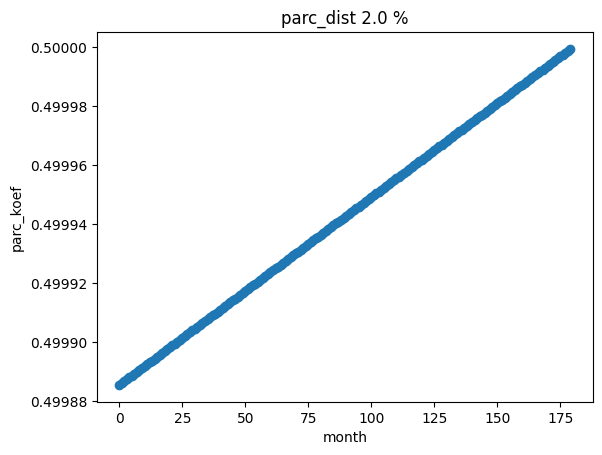

2 -11565574.550870027


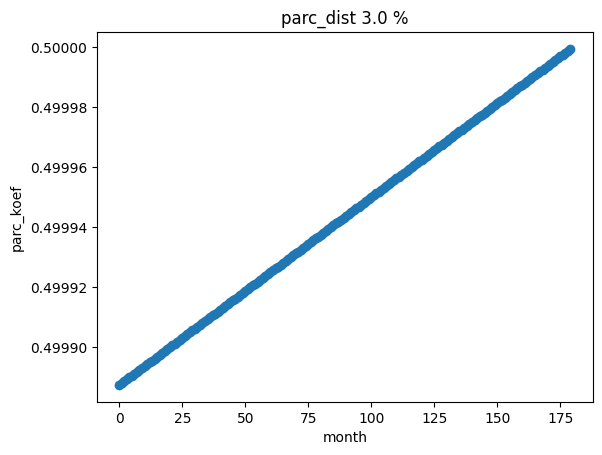

3 -11445929.875919921


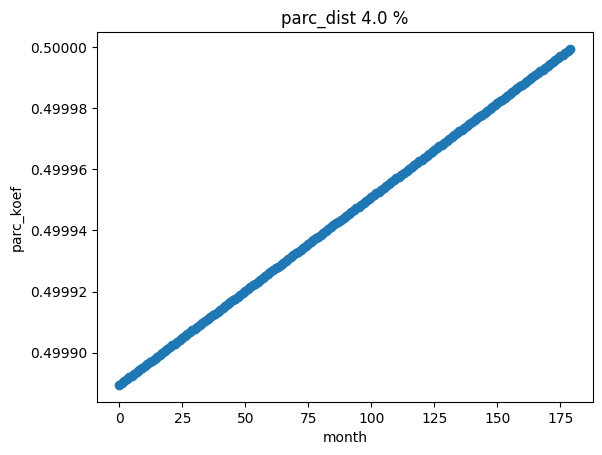

4 -11315884.87679453


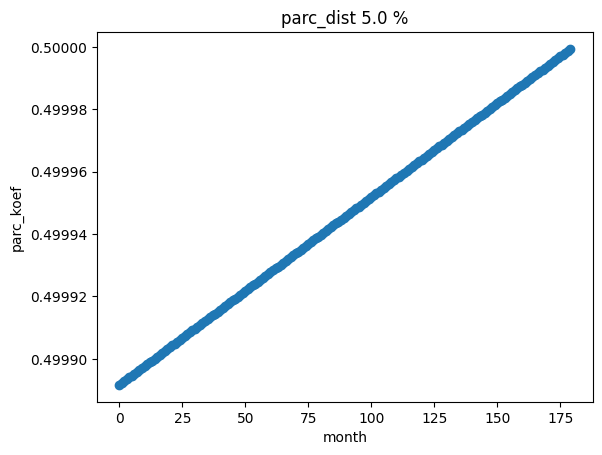

5 -11174434.471476018


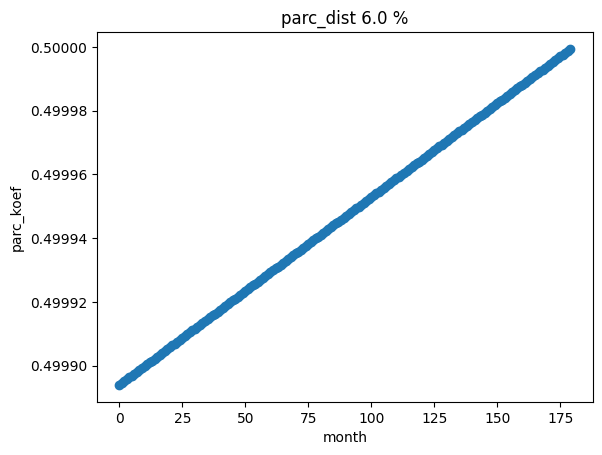

6 -11020470.987300368


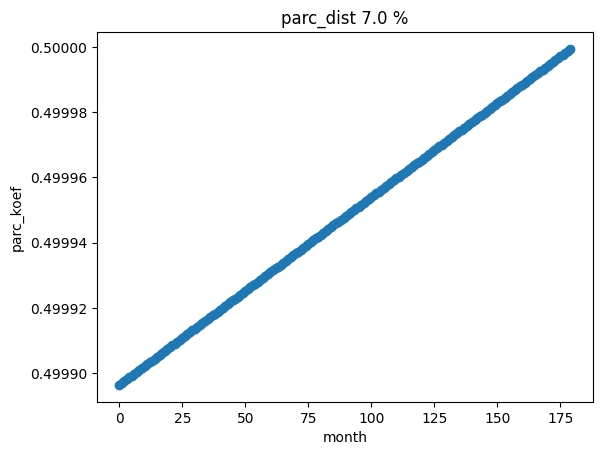

7 -10852773.3506194


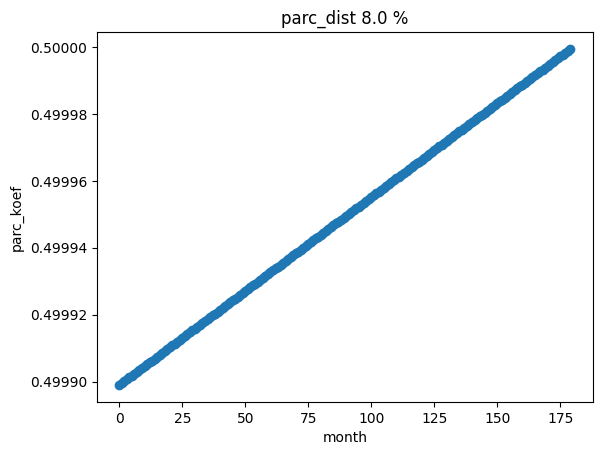

8 -10669995.114658622


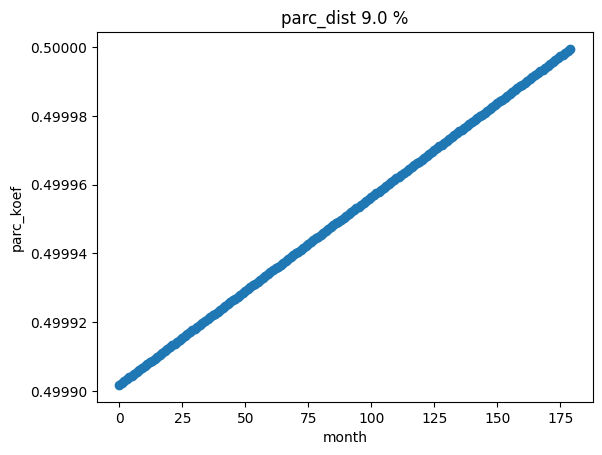

9 -10470651.199106371


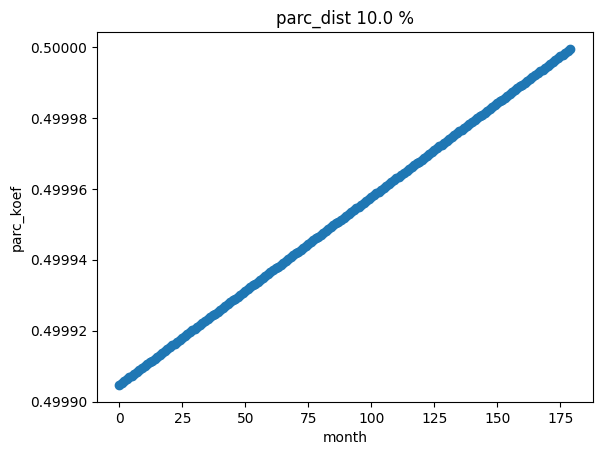

10 -10253103.201082353


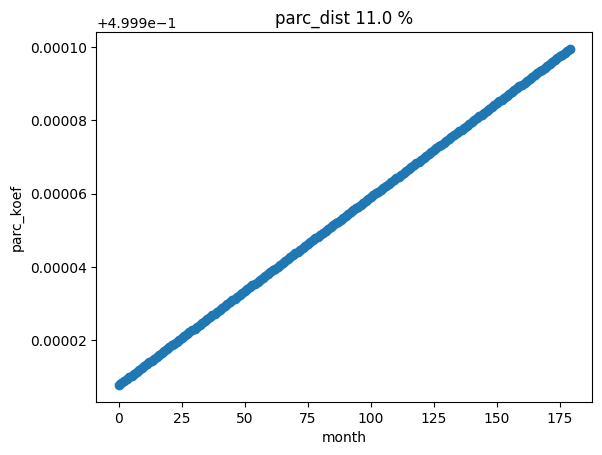

11 -10015543.121713351


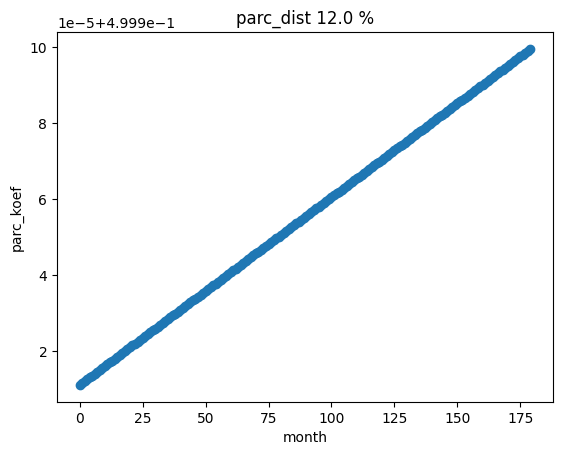

12 -9755975.335420039


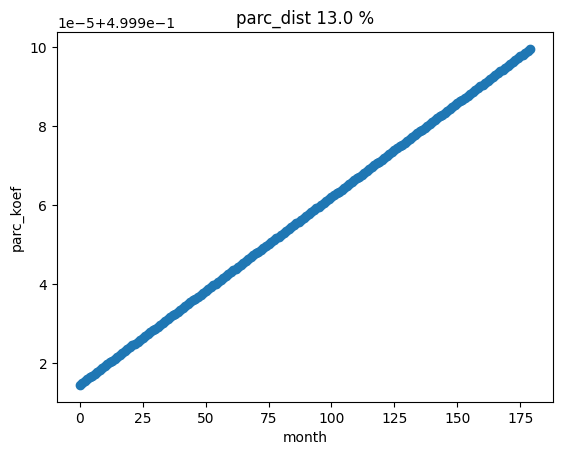

13 -9472196.610006006


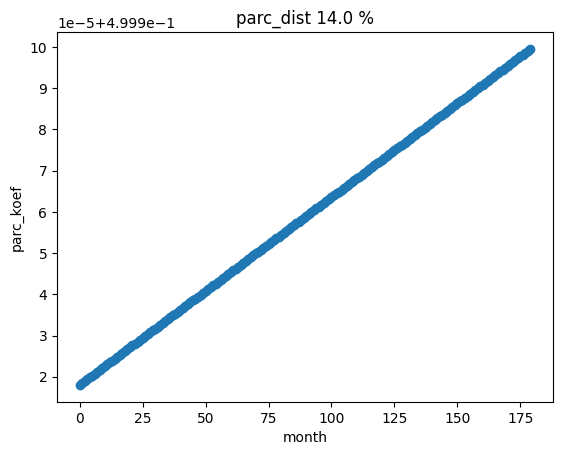

14 -9161773.964530753


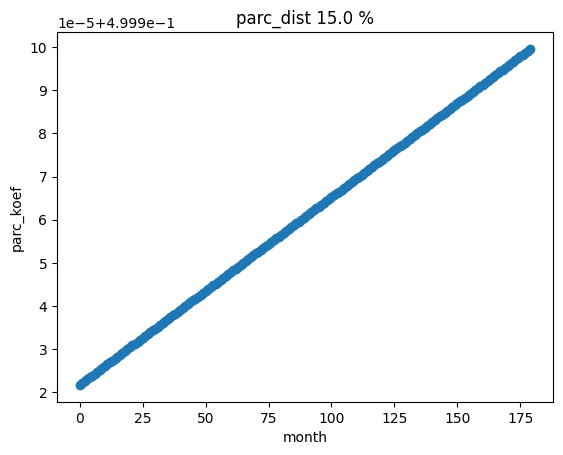

15 -8822020.128515575


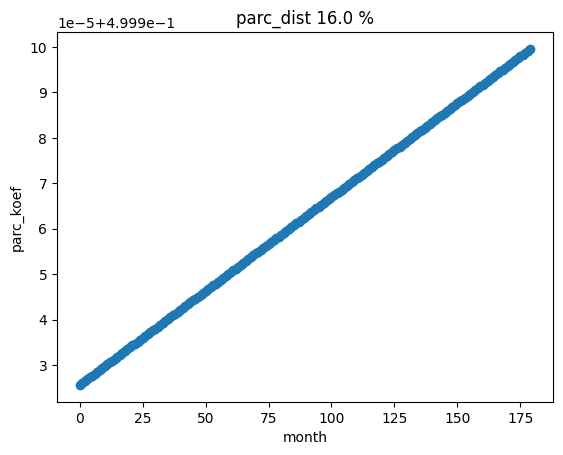

16 -8449966.340023316


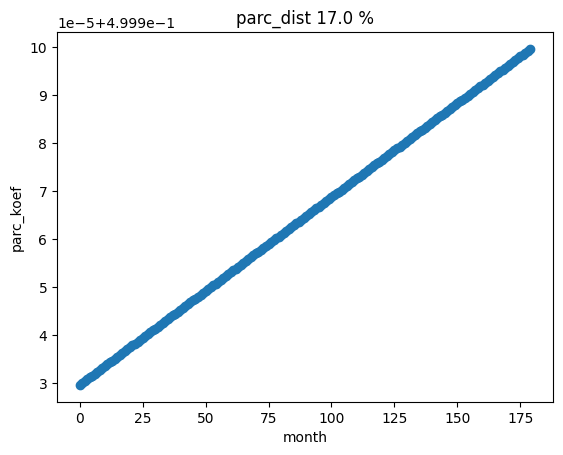

17 -8042332.191295756


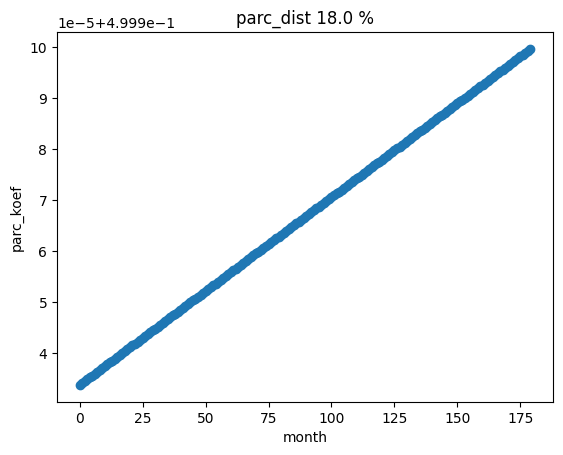

18 -7595492.198619848


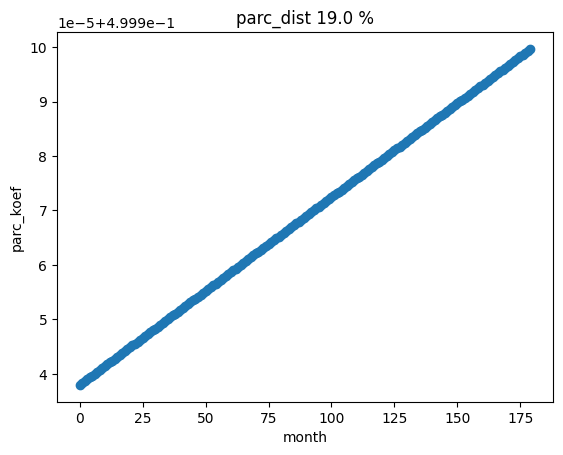

19 -7105438.737596983


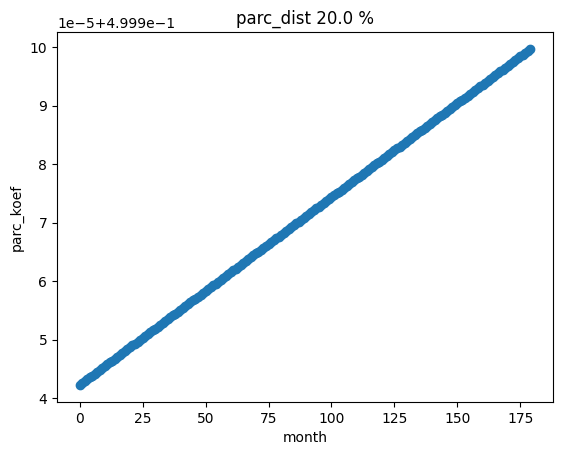

20 -6567740.945636032


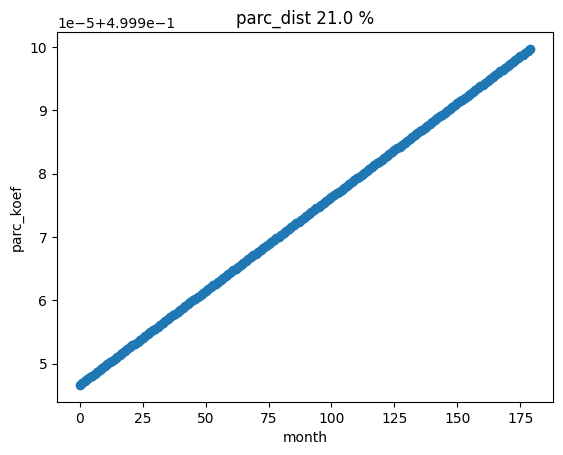

21 -5977499.149880307


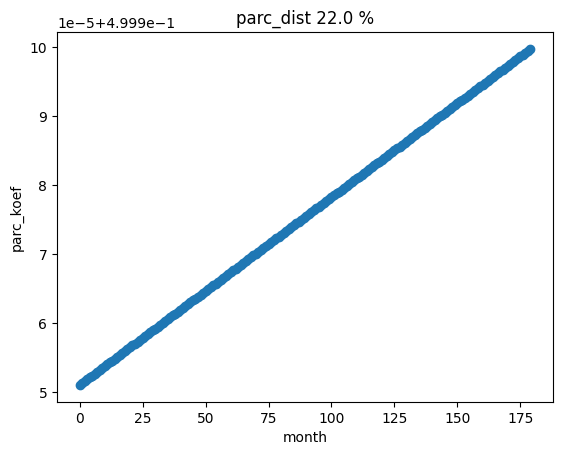

22 -5329294.330455277


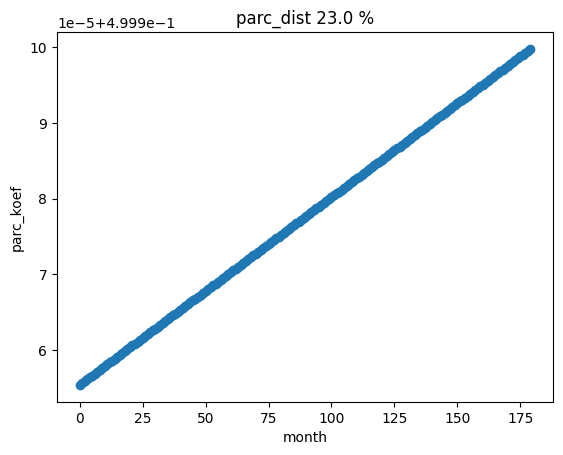

23 -4617132.07538511


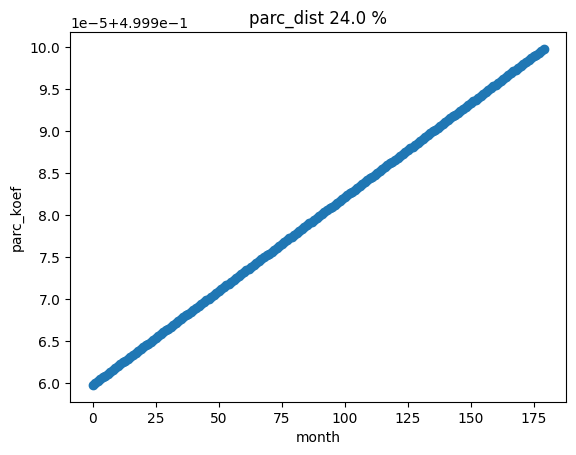

24 -3834380.424195828


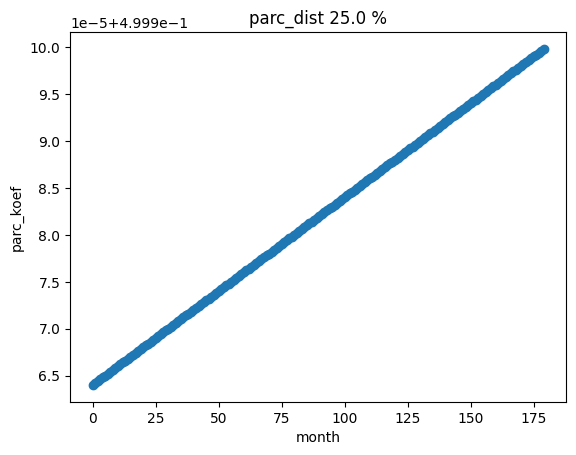

25 -2973700.931443981


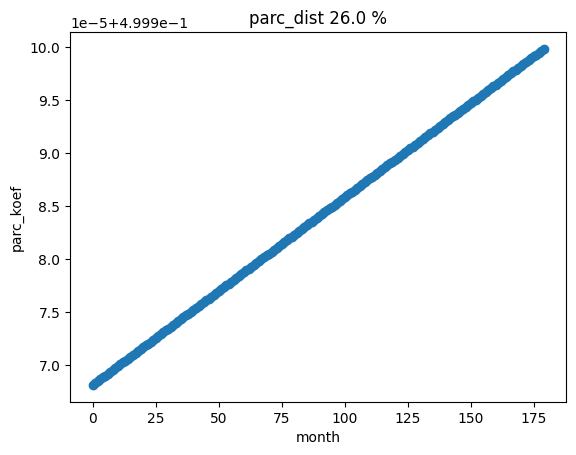

26 -2026972.208420639


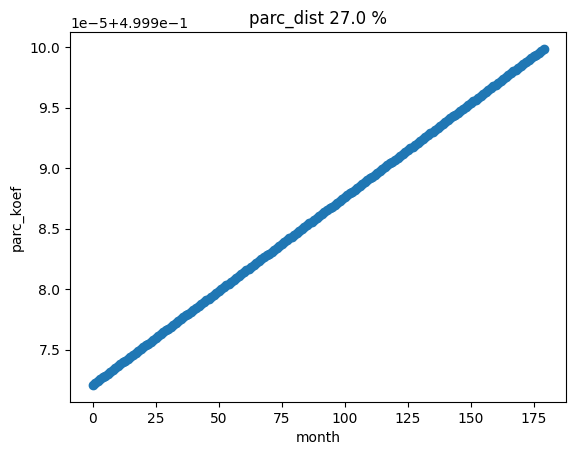

27 -985205.1201931733


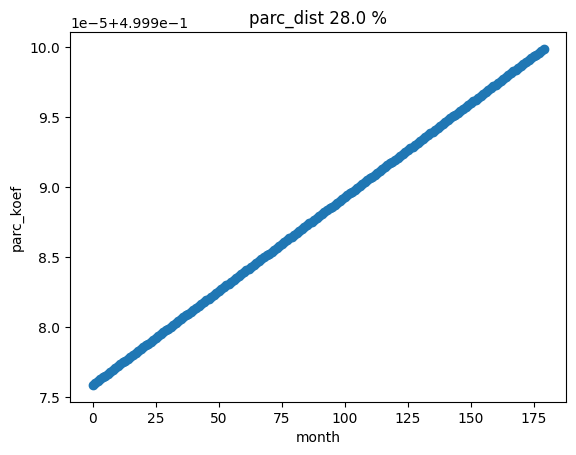

28 161551.27506850456


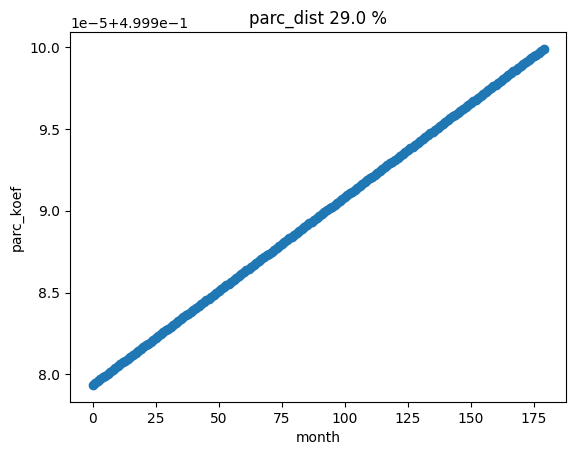

29 1424314.0580633618


In [131]:

test_dist_percel_contribution = []
for percel_contribution_i in range(2,30):
    parcition_test = learn_net(credit,percel_mortgage/12,percel_contribution_i/12,ready_O_P,p,month,0)    
    #profit_oldmax = -9284588.216998143
    protfit_newmmax = profit0(parcition_test,credit,0,p,month,percel_mortgage/12,percel_contribution_i/12)
    test_dist_percel_contribution.append(protfit_newmmax)
    print(percel_contribution_i,protfit_newmmax)


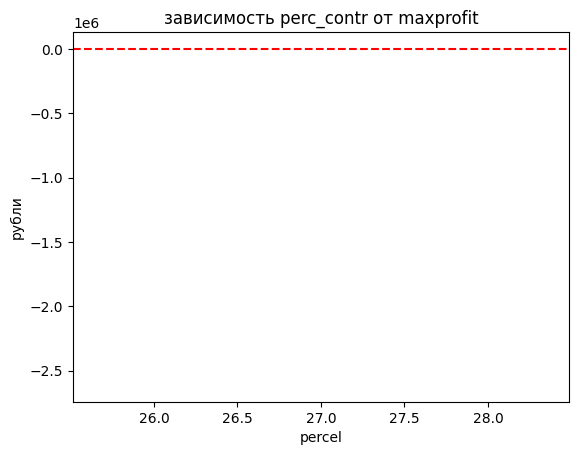

In [128]:

plt.plot([i for i in range(len(test_dist_percel_contribution))], test_dist_percel_contribution, label="percel_contribution_maxprofit")

plt.title('зависимость perc_contr от maxprofit')
plt.xlabel('percel')
plt.ylabel('рубли')

x_intersection = 26
plt.axhline(y=0, color='r', linestyle='--')
#plt.axvline(x=x_intersection, color='b', linestyle='--')
#plt.text(x=x_intersection, y=2, s=str(x_intersection), color='b', ha='right')
# Показать график
plt.show()

C:\Users\nikit\AppData\Local\Temp\ipykernel_7424\1832492277.py:110: RuntimeWarning: overflow encountered in exp
  y0 = 1/(1+np.exp(-profit_pred))
C:\Users\nikit\AppData\Local\Temp\ipykernel_7424\1832492277.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  y1 =  (y-y0) /(np.exp(profit)*y0**2 )
C:\Users\nikit\AppData\Local\Temp\ipykernel_7424\1832492277.py:16: RuntimeWarning: overflow encountered in exp
  y1 =  (y-y0) /(np.exp(profit)*y0**2 )
C:\Users\nikit\AppData\Local\Temp\ipykernel_7424\1832492277.py:114: RuntimeWarning: invalid value encountered in multiply
  grad = ls*a*diff_sig(parcition_k)


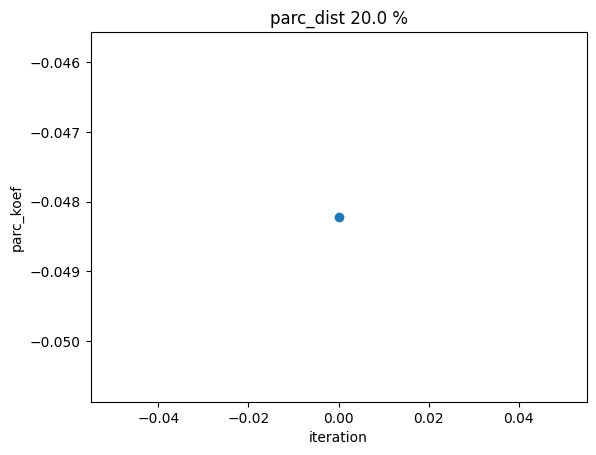

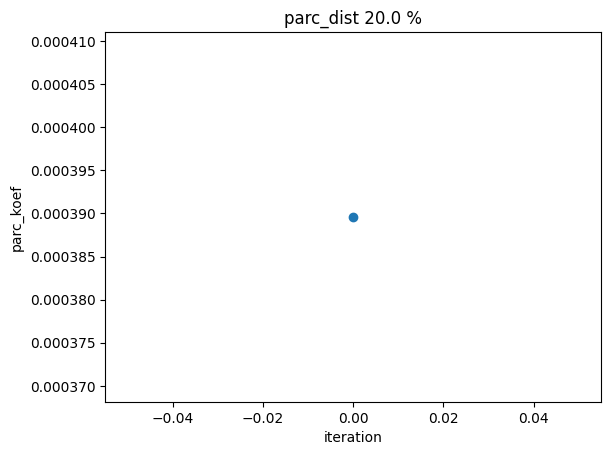

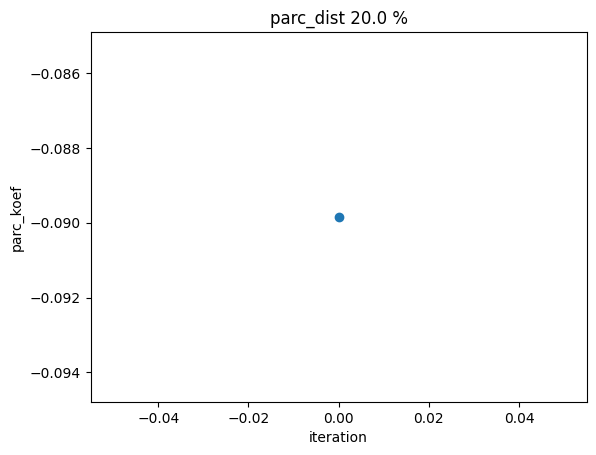

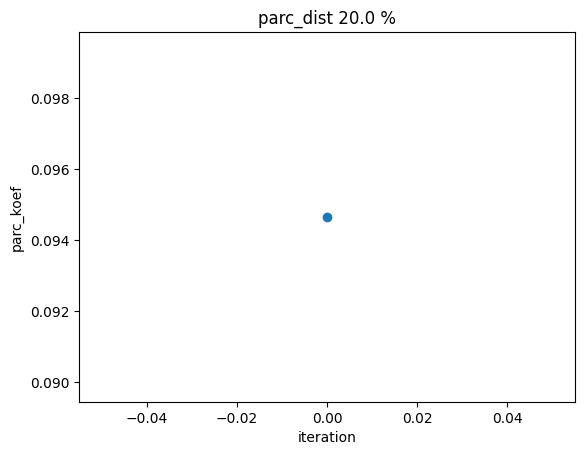

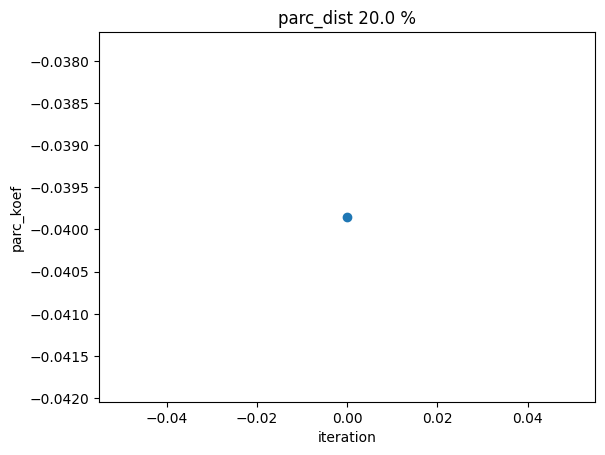

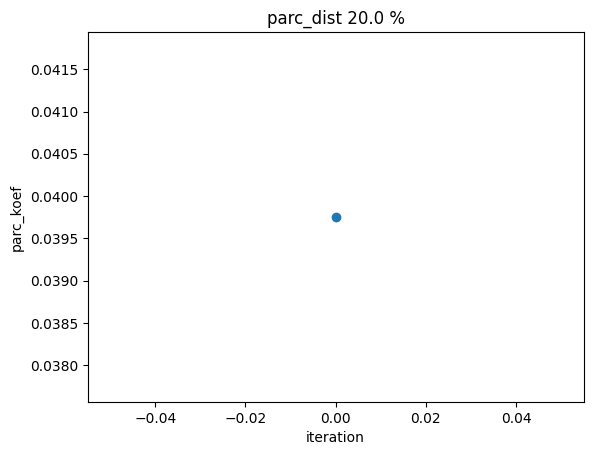

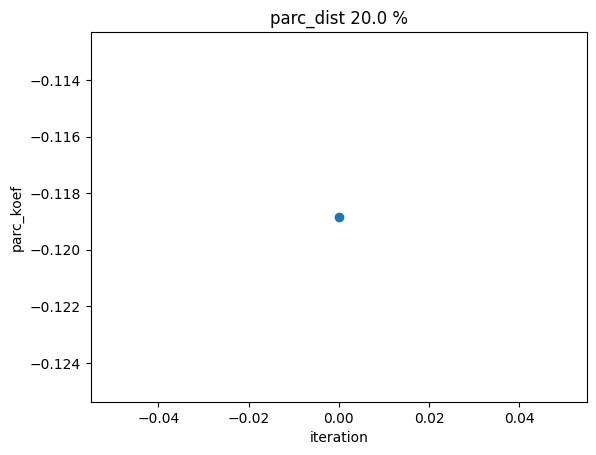

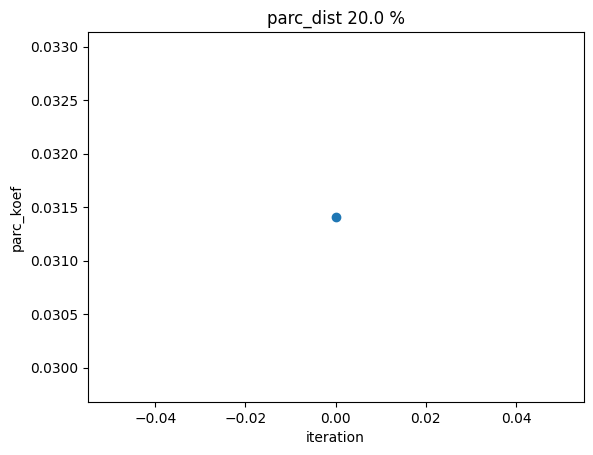

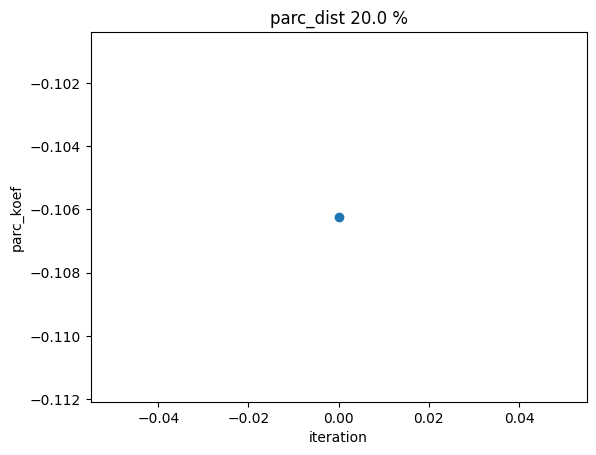

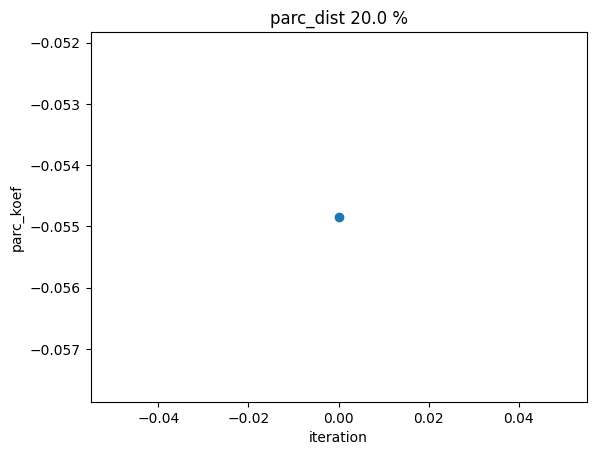

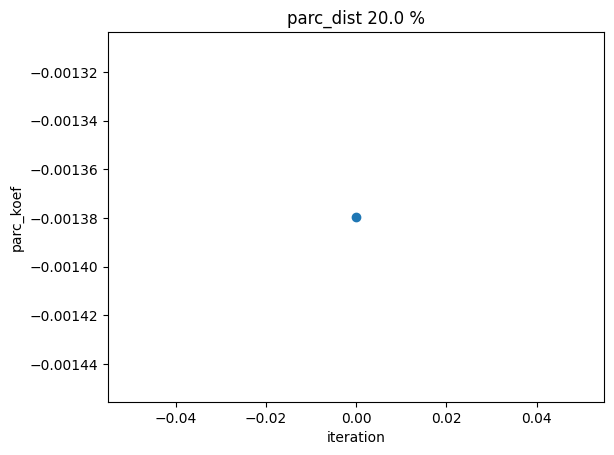

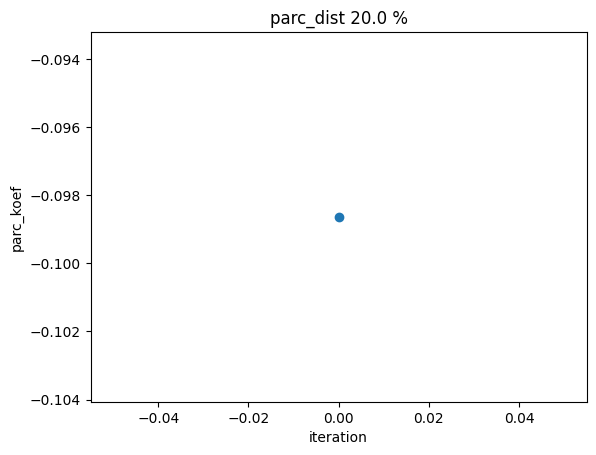

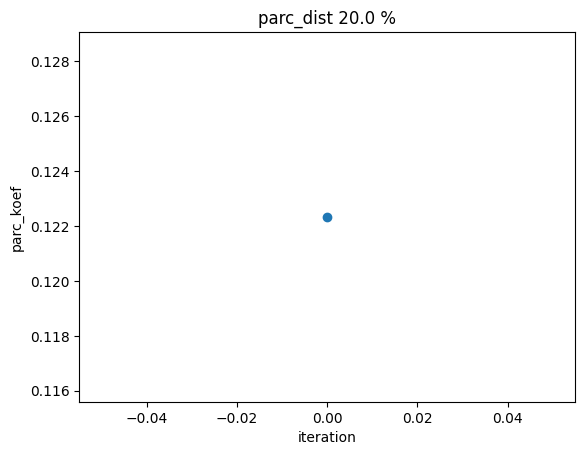

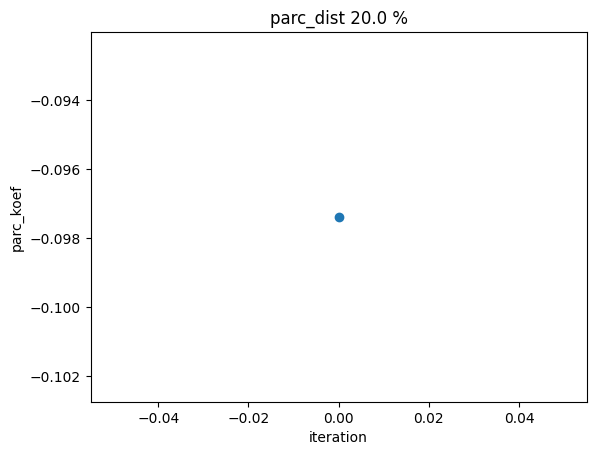

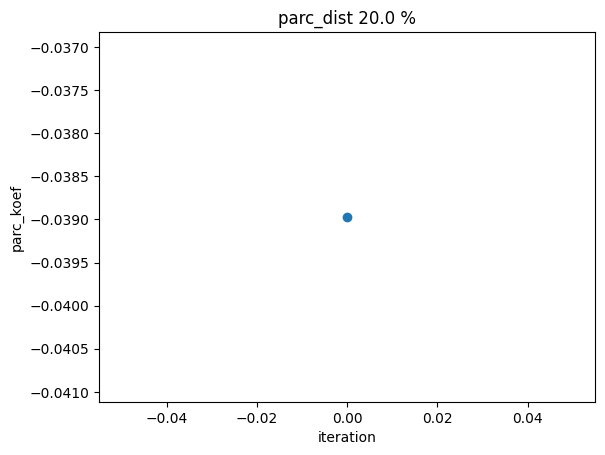

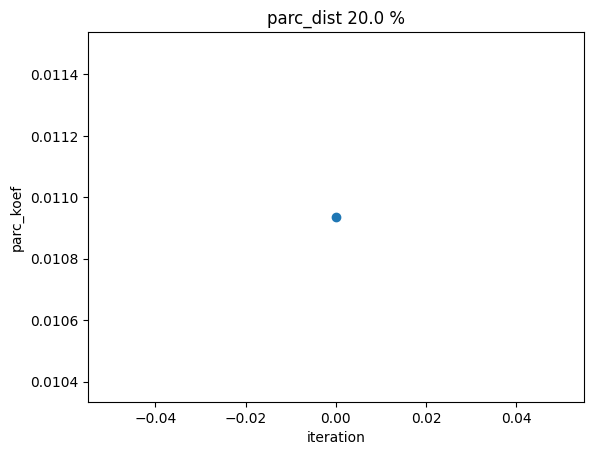

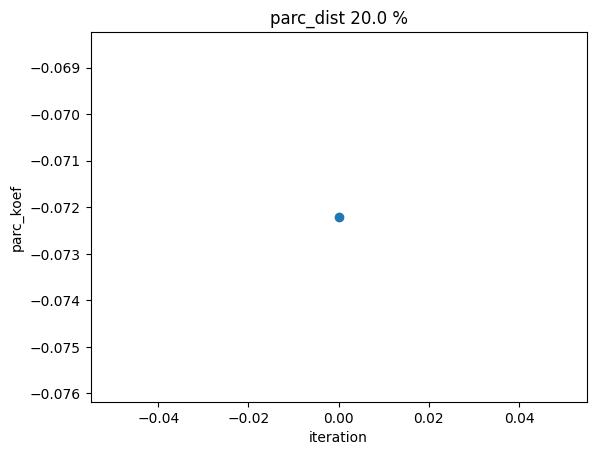

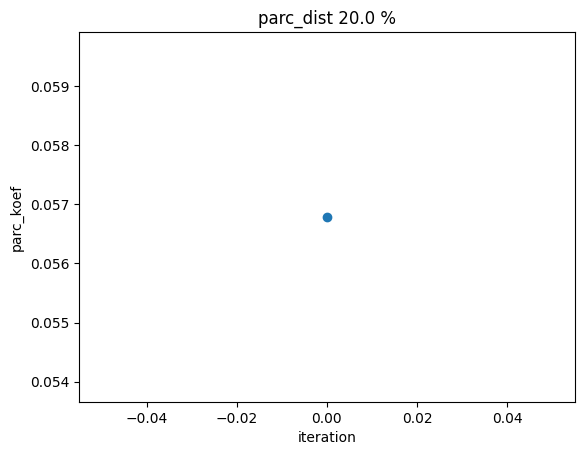

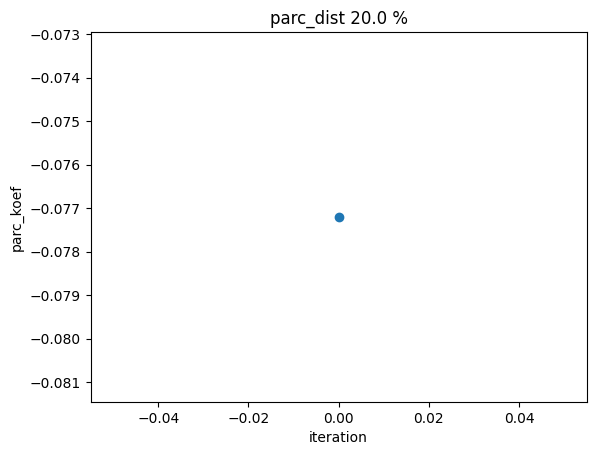

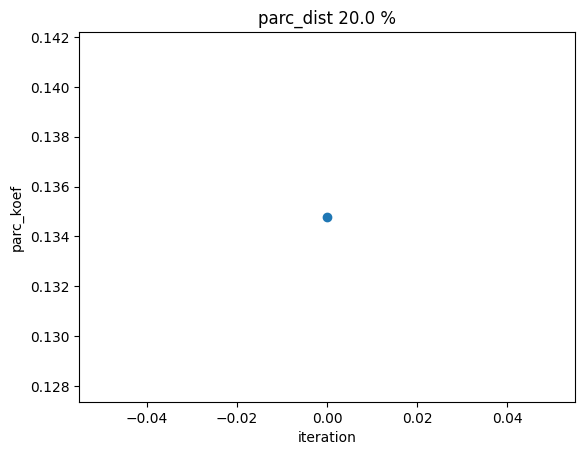

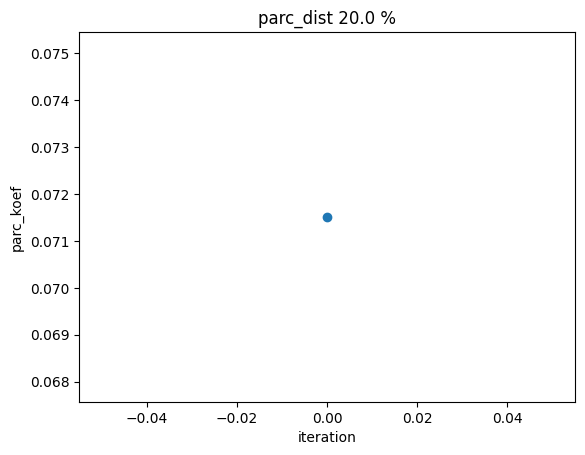

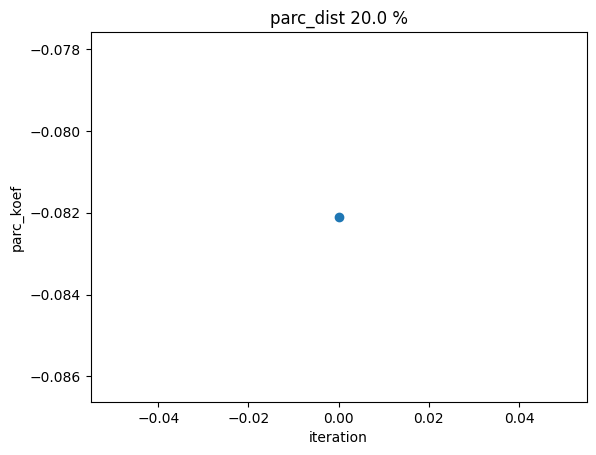

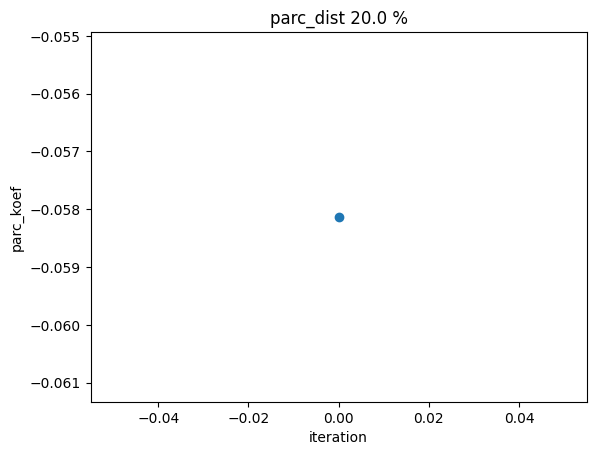

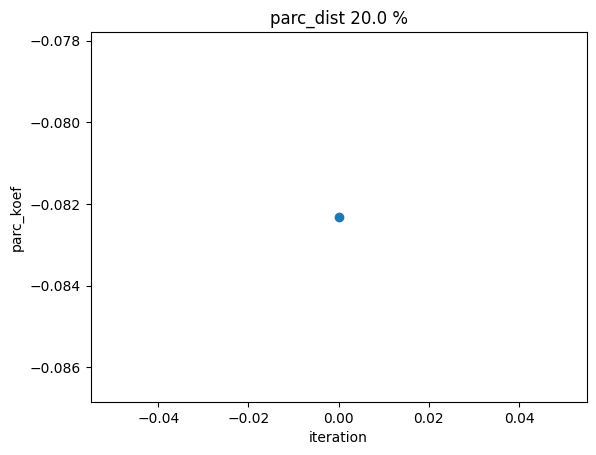

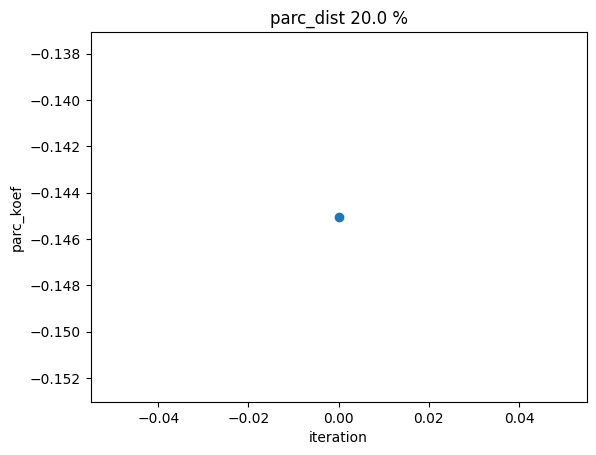

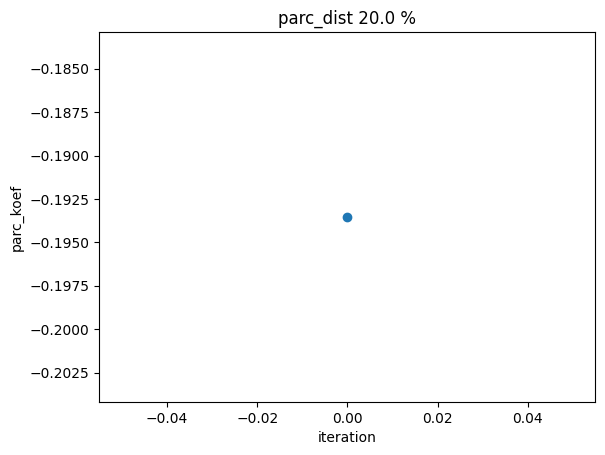

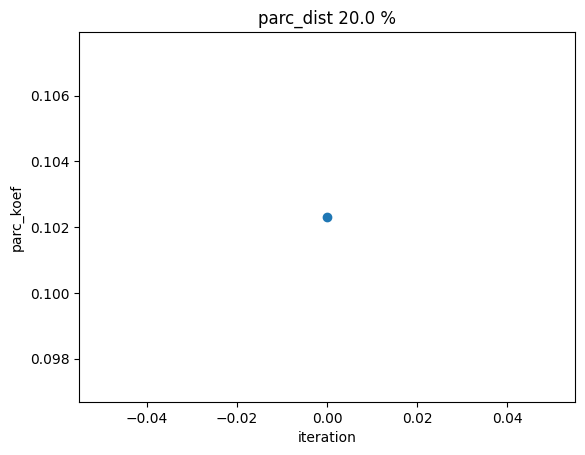

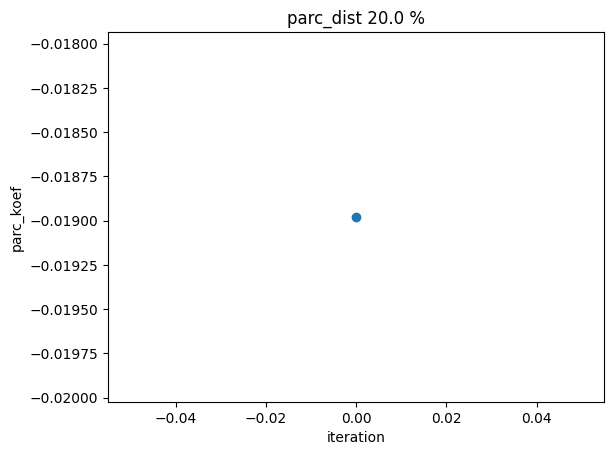

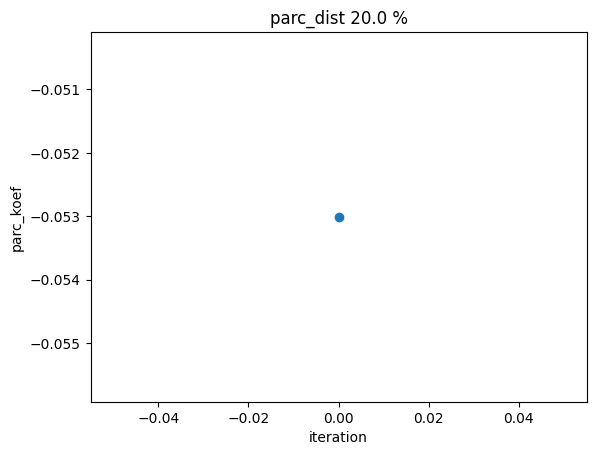

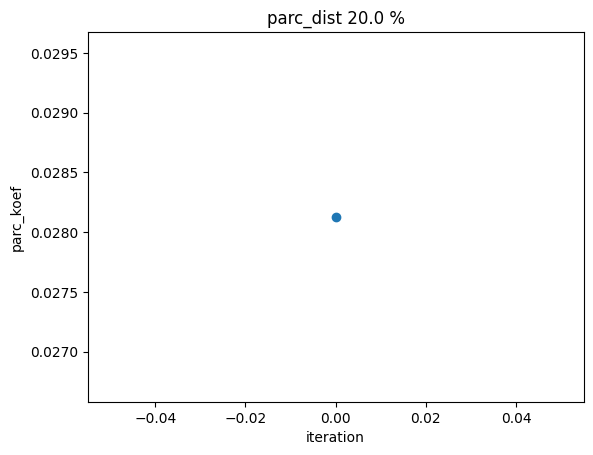

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [129]:


learn_net(credit,percel_mortgage/12,20/12,ready_O_P,p,month,1)